In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import os
import seaborn as sns
import warnings

In [3]:
os.chdir('C:\\Users\\nikit\\Desktop\\ALABS\\PYTHON CASE STUDIES\\CASE studies\\Case Study 2 - Credit Card Case Study')

In [5]:

Customer_Acqusition = pd.read_csv('Customer Acqusition.csv')
Repayment = pd.read_csv('Repayment.csv')
spend = pd.read_csv('spend.csv')

In [7]:
Credit_card_data = pd.read_excel('Credit Card Data.xlsx')

In [23]:
Customer_Acqusition

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [149]:
Repayment[Repayment.Customer== 'A1']

,Customer,Repayment_date,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88
5,A1,2005-02-23,365366.62
6,A1,2005-02-01,14473.41
102,A1,2004-01-12,350446.82
116,A1,2004-02-05,117964.43
130,A1,2006-04-19,79849.19


In [147]:
spend[spend.Customer== 'A1']

,Customer,Spend_date,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13
2,A1,2004-01-15,CLOTHES,23740.46
3,A1,2004-01-25,FOOD,484342.47
4,A1,2005-01-17,CAMERA,369694.07
5,A1,2005-02-23,SANDALS,168285.60
6,A1,2005-02-01,CAR,23370.20
102,A1,2004-01-12,TRAIN TICKET,440563.22
116,A1,2004-02-05,BUS TICKET,52208.65
130,A1,2006-04-19,AIR TICKET,346925.68


# Information on provided tables :


In [228]:
print ('The Customer Acqusition table consists of :',Customer_Acqusition.shape[0],'rows ;',Customer_Acqusition.shape[1],'columns')
print ('The Repayment table consists of :',Repayment.shape[0],'rows ;',Repayment.shape[1],'columns')
print ('The Spend table consists of :',spend.shape[0],'rows ;',spend.shape[1],'columns')


The Customer Acqusition table consists of : 100 rows ; 8 columns
The Repayment table consists of : 1523 rows ; 5 columns
The Spend table consists of : 1500 rows ; 5 columns


In [11]:
Customer_Acqusition.info()
Repayment.info()
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   No        100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Age       100 non-null    int64  
 3   City      100 non-null    object 
 4   Product   100 non-null    object 
 5   Limit     100 non-null    float64
 6   Company   100 non-null    object 
 7   Segment   100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SL No:      1499 non-null   float64
 1   Customer    1500 non-null   object 
 2   Month       1500 non-null   object 
 3   Amount      1500 non-null   float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 59.6+ KB

In [ ]:
# based on the above information it can be observed that the repayment table have null values in each column .
# In repayment and spend table month column has dataype object instead of date-time


# Changing datatype 

In [9]:
Repayment.Month=  Repayment.Month.str.replace('/','-')

In [11]:
Repayment.Month=  pd.to_datetime(Repayment.Month,format='%d-%b-%y')
spend.Month = pd.to_datetime(spend.Month,format= '%d-%b-%y')

In [13]:
# For convenience purpose we consider it the year 2000s and the date has been converted to datetime format in both tables .
Repayment.Month
spend.Month

0      2004-01-12
1      2004-01-03
2      2004-01-15
3      2004-01-25
4      2005-01-17
          ...    
1495   2006-02-04
1496   2006-03-25
1497   2006-03-31
1498   2006-03-23
1499   2006-03-24
Name: Month, Length: 1500, dtype: datetime64[ns]

# Changing column names:

In [13]:
Repayment.rename(columns={'Month': 'Repayment_date'},inplace= True)

In [15]:
spend.rename(columns={'Month': 'Spend_date'},inplace= True)

In [38]:
spend

,Sl No:,Customer,Spend_date,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,2006-02-04,BUS TICKET,356872.73
1496,1497,A68,2006-03-25,BUS TICKET,204971.10
1497,1498,A69,2006-03-31,BUS TICKET,50449.44
1498,1499,A70,2006-03-23,BUS TICKET,80593.94


## Checking for missing values :

In [45]:
Customer_Acqusition.isna().sum()


No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [47]:
Repayment.isna().sum()


SL No:              24
Customer            23
Repayment_date      23
Amount              23
Unnamed: 4        1523
dtype: int64

In [85]:
Repayment 

,SL No:,Customer,Repayment_date,Amount,Unnamed: 4
0,NaN,A1,2004-01-12,495414.75,NaN
1,2.0,A1,2004-01-03,245899.02,NaN
2,3.0,A1,2004-01-15,259490.06,NaN
3,4.0,A1,2004-01-25,437555.12,NaN
4,5.0,A1,2005-01-17,165972.88,NaN
...,...,...,...,...,...
1518,NaN,NaN,NaT,NaN,NaN
1519,NaN,NaN,NaT,NaN,NaN
1520,NaN,NaN,NaT,NaN,NaN
1521,NaN,NaN,NaT,NaN,NaN


In [17]:
# It can be seen that repayment table has a column , which contains 1523 null values . Since the rows in the table is 1523...this colmn stands unsignificant and will be removed.
Repayment.drop('Unnamed: 4', axis= 1, inplace = True)

In [19]:
Repayment.drop('SL No:', axis= 1, inplace = True)

In [49]:
spend.isna().sum()

Sl No:        0
Customer      0
Spend_date    0
Type          0
Amount        0
dtype: int64

In [21]:
spend.drop('Sl No:', axis= 1, inplace = True)

## Removing null values

In [ ]:
# Repayment table have null values need to check of percentage of null values is below 5% as per industry standards

In [246]:
Repayment.isna().sum()/len(Repayment)

Customer          0.0
Repayment_date    0.0
Amount            0.0
dtype: float64

In [ ]:
## Since the missing values in Repayment columns is less than 5%  as per industry standards we have decided to drop them. 

In [23]:
Repayment.dropna(inplace= True)

# Checking for duplicates :

In [120]:
Customer_Acqusition.duplicated().sum()
 

0

In [122]:
Repayment.duplicated().sum()

0

In [124]:
spend.duplicated().sum()

0

In [ ]:
# Thus no duplicate values has been observed across all tables 

# Merging all the tables into one 

In [167]:
Customer_spend= pd.merge(left = Customer_Acqusition, right= spend,how = 'left',on = 'Customer'  )

In [165]:
Customer_Repayment = pd.merge(left = Customer_Acqusition, right= Repayment,how = 'left',on = 'Customer' )

In [169]:
 Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Repayment_date,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [171]:
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Amount
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80
1,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13
2,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46
3,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47
4,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66
1496,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,139018.26
1497,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,284521.06
1498,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,90184.22


# 1. In the above dataset,
 a. In case age is less than 18, replace it with mean of age values.

In [25]:
Customer_Acqusition.loc[Customer_Acqusition.Age<18,'Age'] = Customer_Acqusition.Age.mean()

C:\Users\nikit\AppData\Local\Temp\ipykernel_14572\2064410752.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.49' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  Customer_Acqusition.loc[Customer_Acqusition.Age<18,'Age'] = Customer_Acqusition.Age.mean()


In [254]:
Customer_Acqusition[Customer_Acqusition.Age==46.49]

,No,Customer,Age,City,Product,Limit,Company,Segment
13,14,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
40,41,A41,46.49,COCHIN,Platimum,500000.0,C23,Govt
62,63,A63,46.49,BANGALORE,Gold,500000.0,C25,Self Employed
67,68,A68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
69,70,A70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed
89,90,A90,46.49,COCHIN,Gold,500000.0,C13,Govt


In [187]:
# Initial : Customer_Acqusition.Age.mean()

46.49

In [258]:
# final : Customer_Acqusition.Age.mean()

48.39940000000001

In [256]:
Customer_Acqusition.value_counts()

No   Customer  Age   City        Product  Limit     Company  Segment      
1    A1        76.0  BANGALORE   Gold     500000.0  C1       Self Employed    1
64   A64       77.0  DELHI       Gold     500000.0  C26      Salaried_MNC     1
74   A74       51.0  COCHIN      Silver   100002.0  C36      Self Employed    1
73   A73       75.0  CALCUTTA    Silver   100001.0  C35      Self Employed    1
72   A72       63.0  BANGALORE   Silver   100000.0  C34      Self Employed    1
                                                                             ..
31   A31       63.0  CALCUTTA    Gold     500000.0  C13      Normal Salary    1
30   A30       25.0  BANGALORE   Gold     500000.0  C12      Govt             1
29   A29       72.0  CALCUTTA    Gold     500000.0  C11      Salaried_Pvt     1
28   A28       36.0  TRIVANDRUM  Gold     500000.0  C10      Salaried_MNC     1
100  A100      36.0  COCHIN      Silver   100000.0  C5       Salaried_MNC     1
Name: count, Length: 100, dtype: int64

 b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
(customer’s limit provided in acquisition table is the per transaction limit on his card)

In [27]:
Customer_spend= pd.merge(left = Customer_Acqusition, right= spend,how = 'left',on = 'Customer'  )

In [29]:
Customer_spend.loc[Customer_spend.Amount>Customer_spend.Limit,'Amount']= Customer_spend.Limit/2

In [31]:
Customer_spend [Customer_spend.Amount>Customer_spend.Limit ]

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Amount


c. Incase the repayment amount is more than the limit, replace the repayment with the 
limit

In [33]:
Customer_Repayment = pd.merge(left = Customer_Acqusition, right= Repayment,how = 'left',on = 'Customer' )

In [271]:
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Repayment_date,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,310992.30
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,121874.90
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,337815.57
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,25682.73


In [35]:
Customer_Repayment.loc[Customer_Repayment.Amount>Customer_Repayment.Limit,'Amount']= Customer_Repayment.Limit

In [37]:
Customer_Repayment [Customer_Repayment.Amount>Customer_Repayment.Limit]

,No,Customer,Age,City,Product,Limit,Company,Segment,Repayment_date,Amount


# 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?

In [284]:
Customer_Acqusition.Customer.nunique()

100

In [ ]:
# The total number of distinct customers are : 100

b. How many distinct categories exist?

In [289]:
Customer_Acqusition.Product.nunique()

3

In [ ]:
# The total number of distinct categories are : 100

c. What is the average monthly spend by customers

In [39]:
Customer_spend['spend_Month'] = Customer_spend.Spend_date.dt.strftime('%B')
Customer_spend['spend_Year']= Customer_spend.Spend_date.dt.strftime('%Y')

In [41]:
Customer_spend[['Customer','spend_Month','Amount']].groupby(by=['Customer','spend_Month']).mean()

Amount
Customer spend_Month               
A1       April        261649.250000
         August       344372.100000
         February     175235.690000
         January      372762.587143
         May          361141.310000
...                             ...
A95      January      240401.500000
A96      January       54729.660000
A97      January        5000.000000
A98      January        5000.500000
A99      January        5001.000000

[578 rows x 1 columns]

 d. What is the average monthly repayment by customers?

In [43]:
Customer_Repayment['repay_Month']= Customer_Repayment.Repayment_date.dt.strftime('%B')
Customer_Repayment['Year']= Customer_Repayment.Repayment_date.dt.strftime('%Y')

In [45]:
Customer_Repayment[['Customer','repay_Month','Amount']].groupby(by=['Customer','repay_Month']).mean().reset_index()

,Customer,repay_Month,Amount
0,A1,April,254474.580000
1,A1,February,156374.760000
2,A1,January,343972.327143
3,A1,July,297176.740000
4,A1,November,285729.090000
...,...,...,...
553,A95,January,369405.960000
554,A96,January,100000.000000
555,A97,January,10000.000000
556,A98,January,10001.000000


e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [47]:
Monthly_Repayment= Customer_Repayment[['repay_Month','Amount']].groupby(by=[ 'repay_Month']).mean().reset_index()
Monthly_spend= Customer_spend[['spend_Month','Amount']].groupby(by=['spend_Month']).mean().reset_index()

In [49]:
Bank_data= pd.merge(left=Monthly_spend, right= Monthly_Repayment,how = 'left', left_on= ['spend_Month'], right_on= ['repay_Month'] )

In [51]:
Bank_data['monthly_profit']= Bank_data.Amount_y-Bank_data.Amount_x

In [53]:
Bank_data['final_profit']=np.where(Bank_data.monthly_profit<0,'No profit',Bank_data.monthly_profit*0.029)

In [55]:
Bank_data

,spend_Month,Amount_x,repay_Month,Amount_y,monthly_profit,final_profit
0,April,135035.927333,April,167676.814933,32640.887600,946.5857403999988
1,August,165759.596190,August,152817.425510,-12942.170680,No profit
2,December,117272.680357,December,190138.995000,72866.314643,2113.1231246428574
3,February,151261.565126,February,158873.098158,7611.533032,220.7344579234856
4,January,147770.183266,January,163445.534263,15675.350997,454.58517890856984
5,July,166326.817857,July,165203.918980,-1122.898878,No profit
6,June,182037.731429,June,114146.549375,-67891.182054,No profit
7,March,131840.761861,March,156430.854155,24590.092294,713.1126765195991
8,May,151623.982190,May,186097.903985,34473.921794,999.7437320401
9,November,150428.434643,November,152692.206667,2263.772024,65.6493886904761


In [ ]:
#The profit of bank was the highest in the month of December followed by October.

f. What are the top 5 product types?

In [322]:
spend.Type.value_counts().head(5)

Type
PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: count, dtype: int64

In [ ]:
# The top 5 product have be obtained on the basis of their count

g. Which city is having maximum spend

In [341]:
 Customer_spend[['City','Amount']].groupby(by = 'City' ).sum().sort_values('Amount',ascending = False ).head(1)

,Amount
City,
COCHIN,45963513.5


 h. Which age group is spending more money?

In [57]:
Customer_spend['Age_groups']=pd.cut(Customer_spend.Age,bins = 4)

In [59]:
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Amount,spend_Month,spend_Year,Age_groups
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004,"(64.0, 79.0]"
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004,"(64.0, 79.0]"
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004,"(64.0, 79.0]"
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004,"(64.0, 79.0]"
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005,"(64.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004,"(49.0, 64.0]"
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,January,2004,"(49.0, 64.0]"
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,January,2004,"(49.0, 64.0]"
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,January,2004,"(34.0, 49.0]"


In [61]:
 Customer_spend[['Age_groups','Amount']].groupby(by = 'Age_groups' ).sum().sort_values('Amount',ascending = False ).head(1)

C:\Users\nikit\AppData\Local\Temp\ipykernel_14572\2660555022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Customer_spend[['Age_groups','Amount']].groupby(by = 'Age_groups' ).sum().sort_values('Amount',ascending = False ).head(1)


,Amount
Age_groups,
"(34.0, 49.0]",83197413.81


In [ ]:
The customers falling in the age group of 35 to 49 are seen to spend the most .

i. Who are the top 10 customers in terms of repayment

In [61]:
Customer_Repayment.sort_values('Amount', ascending = False).head(10).Customer

172     A11
890     A40
234     A13
201     A12
875     A40
1488    A89
204     A12
570     A27
643     A30
1448    A62
Name: Customer, dtype: object

# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical 
representation for the same

In [69]:
 Customer_spend[['spend_Year','Product','City','Amount']].groupby(by= ['spend_Year','Product','City'],as_index=['spend_Year','Product']).sum()

Amount
spend_Year Product City                  
2004       Gold    BANGALORE   9289878.54
                   BOMBAY      6987853.53
                   CALCUTTA    7477140.98
                   CHENNAI     1059618.50
                   COCHIN      7315850.15
...                                   ...
2006       Silver  CHENNAI      350009.50
                   COCHIN      1269990.87
                   DELHI        854899.97
                   PATNA        700005.00
                   TRIVANDRUM   555862.12

[72 rows x 1 columns]

In [77]:
pd.crosstab(index=[Customer_spend.spend_Year,Customer_spend.Product],columns=Customer_spend.City,values = Customer_spend.Amount,aggfunc= 'sum')

City                   BANGALORE      BOMBAY     CALCUTTA     CHENNAI  \
spend_Year Product                                                      
2004       Gold       9289878.54  6987853.53   7477140.98  1059618.50   
           Platimum   1112732.30   897264.94   2037690.30  3535652.38   
           Silver     1291852.58   532089.03    500006.00   282056.86   
2005       Gold      12892362.99  8983018.28  10303355.80  3740945.58   
           Platimum    912284.97   711804.94   4434696.31  5053956.32   
           Silver      830612.34   508988.54    440147.06   377184.49   
2006       Gold      12030611.09  7917144.31  11167532.77  2704288.62   
           Platimum    685831.27   972130.01   3589606.66  5024923.40   
           Silver     1415480.94  1092833.80   1157956.42   350009.50   

City                      COCHIN       DELHI       PATNA  TRIVANDRUM  
spend_Year Product                                                    
2004       Gold       7315850.15  2806495.00  2072567.90  2415102.84  
           Platimum   3419904.07   283512.89  1113069.60  2161676.67  
           Silver      814229.62   768172.30   756684.10   209667.48  
2005       Gold      12110613.03  1964845.27  3252615.77  1240375.85  
           Platimum   4960921.71   494157.86  2883231.07  3601443.30  
           Silver      652269.38   612311.21   950094.19   269912.99  
2006       Gold      10499142.38  2957103.32  2276181.69  2735710.87  
           Platimum   4920592.29   176788.72  1256137.65  2147403.75  
           Silver     1269990.87   854899.97   700005.00   555862.12

In [81]:
City_wise_spend = Customer_spend.pivot_table(index = ['spend_Year','Product'], columns = 'City',values = 'Amount',aggfunc= 'sum' )

In [83]:
 City_wise_spend

City                   BANGALORE      BOMBAY     CALCUTTA     CHENNAI  \
spend_Year Product                                                      
2004       Gold       9289878.54  6987853.53   7477140.98  1059618.50   
           Platimum   1112732.30   897264.94   2037690.30  3535652.38   
           Silver     1291852.58   532089.03    500006.00   282056.86   
2005       Gold      12892362.99  8983018.28  10303355.80  3740945.58   
           Platimum    912284.97   711804.94   4434696.31  5053956.32   
           Silver      830612.34   508988.54    440147.06   377184.49   
2006       Gold      12030611.09  7917144.31  11167532.77  2704288.62   
           Platimum    685831.27   972130.01   3589606.66  5024923.40   
           Silver     1415480.94  1092833.80   1157956.42   350009.50   

City                      COCHIN       DELHI       PATNA  TRIVANDRUM  
spend_Year Product                                                    
2004       Gold       7315850.15  2806495.00  2072567.90  2415102.84  
           Platimum   3419904.07   283512.89  1113069.60  2161676.67  
           Silver      814229.62   768172.30   756684.10   209667.48  
2005       Gold      12110613.03  1964845.27  3252615.77  1240375.85  
           Platimum   4960921.71   494157.86  2883231.07  3601443.30  
           Silver      652269.38   612311.21   950094.19   269912.99  
2006       Gold      10499142.38  2957103.32  2276181.69  2735710.87  
           Platimum   4920592.29   176788.72  1256137.65  2147403.75  
           Silver     1269990.87   854899.97   700005.00   555862.12

<Axes: xlabel='spend_Year,Product'>

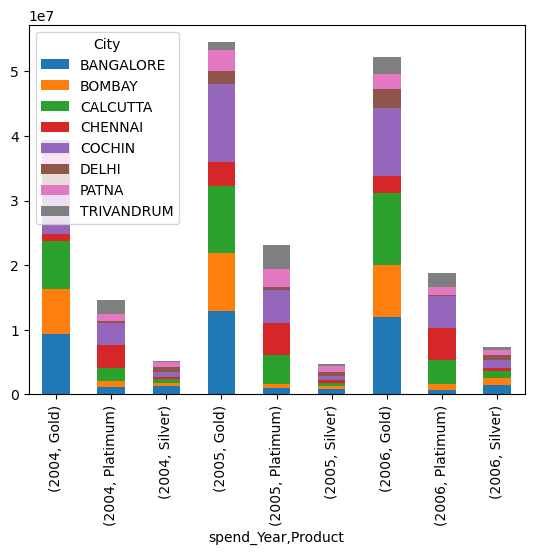

In [222]:
  City_wise_spend.plot(kind = 'bar', stacked = True )

 # 4. Create graphs for
 a. Monthly comparison of total spends, city wise


In [158]:
Monthly_comp= Customer_spend.pivot_table(index= 'spend_Month', columns = 'City', values = 'Amount',aggfunc = 'sum')

<Axes: xlabel='spend_Month'>

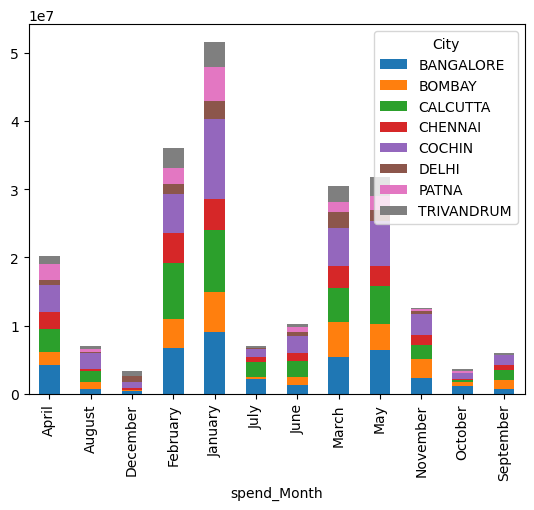

In [190]:
Monthly_comp.plot(kind = 'bar', stacked = True )

b. Comparison of yearly spend on air tickets

array([<Axes: ylabel='Amount'>], dtype=object)

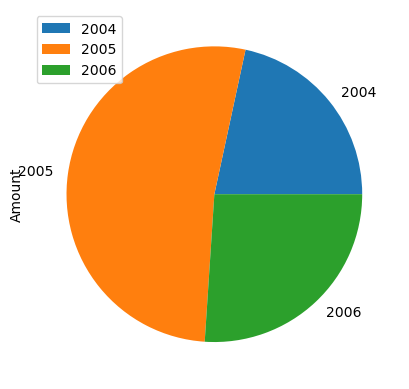

In [200]:
Customer_spend[Customer_spend.Type == 'AIR TICKET'].pivot_table(index ='spend_Year', values = 'Amount', aggfunc= 'sum' ).plot(kind = 'pie', subplots= True)

 c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend

<Axes: xlabel='Spend_date'>

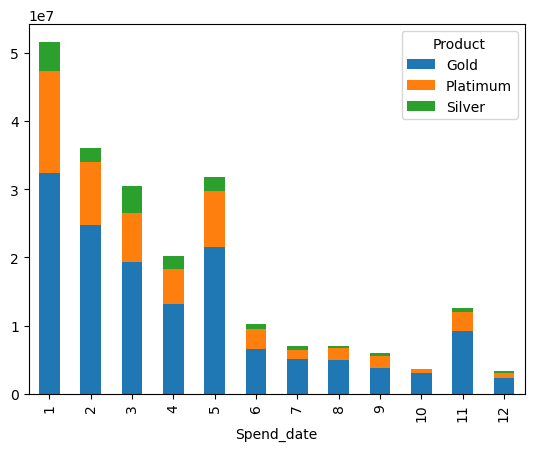

In [220]:
Customer_spend.pivot_table(index =Customer_spend.Spend_date.dt.month,columns = 'Product', values = 'Amount', aggfunc= 'sum' ).plot(kind= 'bar', stacked = True)

In [202]:
Customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Spend_date,Type,Amount,spend_Month,spend_Year,Age_groups
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,January,2004,"(64.0, 79.0]"
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,January,2004,"(64.0, 79.0]"
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,January,2004,"(64.0, 79.0]"
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,January,2004,"(64.0, 79.0]"
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,January,2005,"(64.0, 79.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,January,2004,"(49.0, 64.0]"
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,January,2004,"(49.0, 64.0]"
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,January,2004,"(49.0, 64.0]"
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,January,2004,"(34.0, 49.0]"


In [100]:
Customer_Repayment

,No,Customer,Age,City,Product,Limit,Company,Segment,Repayment_date,Amount,repay_Month,Year
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,495414.75,January,2004
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.02,January,2004
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,259490.06,January,2004
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,437555.12,January,2004
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,165972.88,January,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,100000.00,January,2004
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,10000.00,January,2004
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,10001.00,January,2004
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,10002.00,January,2004


In [110]:
Customer_repay_agg = Customer_Repayment[['repay_Month','Year','City','Product','Customer', 'Amount']].groupby(by =['Year','repay_Month','City','Product','Customer']).sum().reset_index()


In [128]:
Customer_Repayment[(Customer_Repayment.Product=='Gold') & (Customer_Repayment.Year=='2004') &(Customer_Repayment.City=='BANGALORE')& (Customer_Repayment.repay_Month=='April') ]

,No,Customer,Age,City,Product,Limit,Company,Segment,Repayment_date,Amount,repay_Month,Year
238,14,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt,2004-04-25,453661.84,April,2004
247,14,A14,46.49,BANGALORE,Gold,500000.0,C14,Salaried_Pvt,2004-04-06,358920.36,April,2004


In [126]:
Customer_repay_agg[(Customer_repay_agg.Product=='Gold') & (Customer_repay_agg.Year == '2004')]

,Year,repay_Month,City,Product,Customer,Amount
0,2004,April,BANGALORE,Gold,A14,812582.20
3,2004,April,BOMBAY,Gold,A12,429751.89
4,2004,April,BOMBAY,Gold,A62,634074.00
7,2004,April,CALCUTTA,Gold,A60,868512.38
12,2004,April,COCHIN,Gold,A45,487103.26
...,...,...,...,...,...,...
159,2004,November,PATNA,Gold,A26,82167.81
163,2004,September,BANGALORE,Gold,A13,439840.91
166,2004,September,BOMBAY,Gold,A12,289407.01
173,2004,September,COCHIN,Gold,A45,64774.66


 5. Write user defined PYTHON function to perform the following analysis:
 You need to find top 10 customers for each city in terms of their repayment amount by 
different products and by different time periods i.e. year or month. The user should be able 
to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the 
function should automatically take these inputs while identifying the top 10 customers.

In [249]:
Customer_repay_agg[Customer_repay_agg.Product== 'Gold'].nunique()
    
    

Year             3
repay_Month     12
City             8
Product          1
Customer        38
Amount         305
dtype: int64

In [255]:
def Top_10 (Product,Time_period):
    Filtered_product = Customer_repay_agg[Customer_repay_agg.Product== Product]
    if  Time_period == 'Yearly':
        Grouped = Filtered_product[['Year', 'City','Product','Customer','Amount']].groupby(by= ['Year', 	'City',	'Product',	'Customer']).sum() 
    if Time_period == 'Monthly':
        Grouped= Filtered_product[['repay_Month', 'City',	'Product',	'Customer',	'Amount']].groupby(by= ['repay_Month', 	'City',	'Product',	'Customer']).sum() 
        
    Top = Grouped.sort_values('Amount',ascending= False ) 
    return Top
       

In [257]:
Top_10('Gold','Yearly')

Amount
Year City      Product Customer            
2005 COCHIN    Gold    A61       4276860.55
     DELHI     Gold    A44       4165317.77
     COCHIN    Gold    A45       4042447.57
     BANGALORE Gold    A43       4006956.60
                       A13       3757673.00
...                                     ...
2006 BANGALORE Gold    A88        146821.30
     PATNA     Gold    A66        113094.58
     COCHIN    Gold    A90        109931.32
2004 CHENNAI   Gold    A67         67845.60
2005 CHENNAI   Gold    A67         55638.77

[88 rows x 1 columns]